<a href="https://colab.research.google.com/github/choheeee22/ds_Section1_Project/blob/main/Section1_Project_GameIndustry.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from google.colab import files
uploaded=files.upload()

import io 

Saving vgames2.csv to vgames2 (1).csv


In [2]:
dfraw=pd.read_csv("vgames2.csv",thousands=',')
dfraw.drop(dfraw.columns[dfraw.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)
dfraw


Name  ... Other_Sales
0                        Candace Kane's Candy Factory  ...           0
1                                      The Munchables  ...        0.01
2      Otome wa Oanesama Boku ni Koi Shiteru Portable  ...           0
3                    Deal or No Deal: Special Edition  ...           0
4           Ben 10 Ultimate Alien: Cosmic Destruction  ...        0.04
...                                               ...  ...         ...
16593                         Ice Age 2: The Meltdown  ...        0.01
16594                     Rainbow Islands: Revolution  ...           0
16595                                        NBA 2K16  ...        0.13
16596                     Toukiden: The Age of Demons  ...        0.03
16597                        The King of Fighters '95  ...        0.01

[16598 rows x 9 columns]

In [3]:
dfraw.dtypes

Name            object
Platform        object
Year           float64
Genre           object
Publisher       object
NA_Sales        object
EU_Sales        object
JP_Sales        object
Other_Sales     object
dtype: object

수량 단위는 million으로 추정 (1,000,000)
추정 근거 자료 
https://en.wikipedia.org/wiki/List_of_best-selling_video_games

In [4]:
#sales features 뽑아내기 - df_sales
df_sales=dfraw.loc[:,'NA_Sales':'Other_Sales']
df_sales

NA_Sales EU_Sales JP_Sales Other_Sales
0         0.04        0        0           0
1         0.17        0        0        0.01
2            0        0     0.02           0
3         0.04        0        0           0
4         0.12     0.09        0        0.04
...        ...      ...      ...         ...
16593     0.15     0.04        0        0.01
16594     0.01        0        0           0
16595     0.44     0.19     0.03        0.13
16596     0.05     0.05     0.25        0.03
16597        0        0     0.16        0.01

[16598 rows x 4 columns]

In [5]:
#실패 K 바꾸는 함수 (# K->  숫자 *1/1000, M-> 지우기 ) =>실패
#def Kto_numeric(i):
#  for index,value in df_sales.iteritems():
#    #if index==columnname:
#    if value.str.contains("K").any():
#      value=value.str.replace('K','')
#      try:
#        value=pd.to_numeric(value)
      #except:
      #continue
#        return value=value*(1/1000)

In [6]:
#실패 K 바꾸는 함수 (# K->  숫자 *1/1000, M-> 지우기 ) => 실패
#def Mto_numeric(i):
#  for index,value in df_sales.iteritems():
    #if index==columnname:
#    if value.str.contains("M").any():
#      value=value.str.replace('M','')
#      try:
#        value=pd.to_numeric(value)
#      except:
#        continue
#    value=value

In [7]:
def converting(x) :
  if "K" in str(x):
    return pd.to_numeric(str(x).replace("K",""))*(1/1000)
  elif "M" in str(x):
    return pd.to_numeric(str(x).replace("M",""))
  else:
    return float(x)


In [8]:
df_sales['NA_Sales']=df_sales['NA_Sales'].apply(converting)

In [9]:
df_sales['EU_Sales']=df_sales['EU_Sales'].apply(converting)

In [10]:
df_sales['JP_Sales']=df_sales['JP_Sales'].apply(converting)

In [11]:
df_sales['Other_Sales']=df_sales['Other_Sales'].apply(converting)

In [12]:
#Sales Data 수정 후 concat -df
df=pd.concat([dfraw.iloc[:,:5],df_sales],axis=1)
df

Name  ... Other_Sales
0                        Candace Kane's Candy Factory  ...        0.00
1                                      The Munchables  ...        0.01
2      Otome wa Oanesama Boku ni Koi Shiteru Portable  ...        0.00
3                    Deal or No Deal: Special Edition  ...        0.00
4           Ben 10 Ultimate Alien: Cosmic Destruction  ...        0.04
...                                               ...  ...         ...
16593                         Ice Age 2: The Meltdown  ...        0.01
16594                     Rainbow Islands: Revolution  ...        0.00
16595                                        NBA 2K16  ...        0.13
16596                     Toukiden: The Age of Demons  ...        0.03
16597                        The King of Fighters '95  ...        0.01

[16598 rows x 9 columns]

In [13]:
#Total sales 열 추가 
df['Total_Sales']=df.iloc[:,5:].sum(axis=1)
df['Total_Sales']

0        0.04
1        0.18
2        0.02
3        0.04
4        0.25
         ... 
16593    0.20
16594    0.01
16595    0.79
16596    0.38
16597    0.17
Name: Total_Sales, Length: 16598, dtype: float64

In [14]:
#중복데이터 확인
df[['Name']].duplicated().sum()

5105

In [15]:
#검사 - 진짜 exact match네... 하지만 platform 이 다른건 다른걸로 치겠어 
df.loc[df['Name']=='NBA 2K12']

Name Platform    Year  ... JP_Sales Other_Sales  Total_Sales
270    NBA 2K12      PSP  2011.0  ...     0.00        0.03         0.28
343    NBA 2K12     X360  2011.0  ...     0.01        0.16         2.62
6929   NBA 2K12      PS3  2011.0  ...     0.05        0.18         2.11
9112   NBA 2K12       PC  2011.0  ...     0.00        0.02         0.16
15533  NBA 2K12      Wii  2011.0  ...     0.00        0.02         0.35

[5 rows x 10 columns]

In [16]:
df[['Name','Platform']].duplicated().sum(),

(5,)

In [17]:
df[['Name','Platform','Year']].duplicated().sum()

2

In [18]:
df_Duplicate=df[df[['Name','Platform','Year','Genre']].duplicated()]
df_Duplicate

Name Platform  ...  Other_Sales Total_Sales
8717                Madden NFL 13      PS3  ...          0.0        0.01
9184  Wii de Asobu: Metroid Prime      Wii  ...          0.0        0.02

[2 rows x 10 columns]

In [19]:
#검사 - 진짜 exact match네... 하지만 platform 이 다른건 서로 다른 게임으로 치겠어 (행 8717만 버리기, mean이 1.09 이므로 )
df.loc[df['Name']=='Madden NFL 13']

Name Platform    Year  ... JP_Sales Other_Sales  Total_Sales
4838   Madden NFL 13     X360  2012.0  ...      0.0        0.17         2.86
5288   Madden NFL 13     WiiU  2012.0  ...      0.0        0.02         0.24
7346   Madden NFL 13      PS3  2012.0  ...      0.0        0.22         2.56
8717   Madden NFL 13      PS3  2012.0  ...      0.0        0.00         0.01
9504   Madden NFL 13      PSV  2012.0  ...      0.0        0.03         0.33
11995  Madden NFL 13      Wii  2012.0  ...      0.0        0.03         0.54

[6 rows x 10 columns]

In [20]:
df['Total_Sales'].loc[df['Name']=='Madden NFL 13'].mean()

1.09

In [21]:
# 완전 일치 -> 한 값 버리기 (9184행 )
df.loc[df['Name']=='Wii de Asobu: Metroid Prime'] 

Name Platform  ...  Other_Sales Total_Sales
8055  Wii de Asobu: Metroid Prime      Wii  ...          0.0        0.02
9184  Wii de Asobu: Metroid Prime      Wii  ...          0.0        0.02

[2 rows x 10 columns]

In [22]:
#df에서 중복값 버리기 -> df2
df2=df.drop([df.index[8717],df.index[9184]])
df2

Name  ... Total_Sales
0                        Candace Kane's Candy Factory  ...        0.04
1                                      The Munchables  ...        0.18
2      Otome wa Oanesama Boku ni Koi Shiteru Portable  ...        0.02
3                    Deal or No Deal: Special Edition  ...        0.04
4           Ben 10 Ultimate Alien: Cosmic Destruction  ...        0.25
...                                               ...  ...         ...
16593                         Ice Age 2: The Meltdown  ...        0.20
16594                     Rainbow Islands: Revolution  ...        0.01
16595                                        NBA 2K16  ...        0.79
16596                     Toukiden: The Age of Demons  ...        0.38
16597                        The King of Fighters '95  ...        0.17

[16596 rows x 10 columns]

In [23]:
#확인 -> good!
df2.loc[df['Name']=='Wii de Asobu: Metroid Prime'] 

Name Platform  ...  Other_Sales Total_Sales
8055  Wii de Asobu: Metroid Prime      Wii  ...          0.0        0.02

[1 rows x 10 columns]

In [24]:
#결측치 확인 
pd.DataFrame(df2.isnull().sum(),columns=["결측치 개수"])

결측치 개수
Name              0
Platform          0
Year            270
Genre            50
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Total_Sales       0

In [25]:
#결측치 정보 확인 - null_data
null_data=df2[df2.isnull().any(axis=1)]
null_data

Name  ... Total_Sales
31                                       Rock Band  ...        2.48
50                        Ape Escape: On the Loose  ...        0.70
109     Yu-Gi-Oh! 5D's Wheelie Breakers (JP sales)  ...        0.02
272                             UK Truck Simulator  ...        0.03
273    Jewel Link Chronicles: Mountains of Madness  ...        0.07
...                                            ...  ...         ...
16425                               Yoostar on MTV  ...        0.06
16431            Cars: Mater-National Championship  ...        0.14
16432                                  Bejeweled 3  ...        0.14
16555                          Apache: Air Assault  ...        0.04
16587                 Need for Speed Underground 2  ...        2.28

[356 rows x 10 columns]

In [26]:
null_data['Total_Sales'].sum()

160.45999999999998

In [27]:
#결측치 total이 전체 데이터에서 차지하는 비율 (sales & 개수 - 2% 정도임)
null_data['Total_Sales'].sum()/df2['Total_Sales'].sum(),357/16595 #sales unit, 개수

(0.017997222913876676, 0.021512503766194638)

In [28]:
#결측치중 꼭 살려야 하는 데이터 파악 (전체데이터 sales unit 75% 기준)-null_data_important (80/357) -22% 살리기 --> 최종 277 버리기 ->new data 16320 개 
null_data_important=null_data[null_data['Total_Sales']>0.47]
null_data_important

Name Platform  ...  Other_Sales Total_Sales
31                             Rock Band     X360  ...         0.21        2.48
50              Ape Escape: On the Loose      PSP  ...         0.05        0.70
408                          NBA Ballers       XB  ...         0.02        0.50
1041       Metal Gear Solid 2: Substance       XB  ...         0.03        0.63
1328                          NFL Street       XB  ...         0.02        0.66
...                                  ...      ...  ...          ...         ...
15426  WarioWare, Inc.: Mega Party Game$       GC  ...         0.02        0.71
15526                         Bloodborne      PS4  ...         0.36        2.38
16275                     Space Invaders     2600  ...         0.03        2.53
16278                      Madden NFL 11      Wii  ...         0.05        0.75
16587       Need for Speed Underground 2       XB  ...         0.10        2.28

[80 rows x 10 columns]

In [29]:
#null_data_important column별 결측치 확인 - 얘를 어떻게 할 지는 생각해보자 
pd.DataFrame(null_data_important.isna().sum(),columns=["결측치 개수"])

결측치 개수
Name              0
Platform          0
Year             54
Genre            21
Publisher         8
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Total_Sales       0

In [30]:
!pip install pandas-profiling==2.7.1 
import pandas_profiling


In [31]:
pandas_profiling.ProfileReport(df)

Summarize dataset:   0%|          | 0/22 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [32]:
#platform/year/genre별 total_sales 보기 -결측치 missing value처리위해 
Total_Sales_by_Genre=pd.DataFrame(df2.groupby(['Genre'])['Total_Sales'].sum().describe())
Total_Sales_by_Platform=pd.DataFrame(df2.groupby(['Platform'])['Total_Sales'].sum().describe())
Total_Sales_by_Year=pd.DataFrame(df2.groupby(['Year'])['Total_Sales'].sum().describe())


In [33]:
Total_Sales_by_Genre_raw=df2[['Genre','Total_Sales']]


In [34]:
all=pd.DataFrame(df2['Total_Sales'].describe())
all

Total_Sales
count  16596.000000
mean       0.537227
std        1.555234
min        0.000000
25%        0.060000
50%        0.170000
75%        0.472500
max       82.740000

In [35]:
#Total slaes에 대한 statistics 비교 (all, groupby) - Comparing_data
Comparing_data=pd.concat([all,Total_Sales_by_Genre,Total_Sales_by_Platform,Total_Sales_by_Year],axis=1)
columns=['all','Total_Sales_by_Genre','Total_Sales_by_Platform','Total_Sales_by_Year']
Comparing_data.columns=columns
Comparing_data

all  ...  Total_Sales_by_Year
count  16596.000000  ...            62.000000
mean       0.537227  ...           142.191129
std        1.555234  ...           198.235802
min        0.000000  ...             0.020000
25%        0.060000  ...             1.592500
50%        0.170000  ...            35.855000
75%        0.472500  ...           253.872500
max       82.740000  ...           676.320000

[8 rows x 4 columns]

In [36]:
Total_Sales_by_Genre_raw

Genre  Total_Sales
0         Action         0.04
1         Action         0.18
2      Adventure         0.02
3           Misc         0.04
4       Platform         0.25
...          ...          ...
16593   Platform         0.20
16594     Action         0.01
16595     Sports         0.79
16596     Action         0.38
16597   Fighting         0.17

[16596 rows x 2 columns]

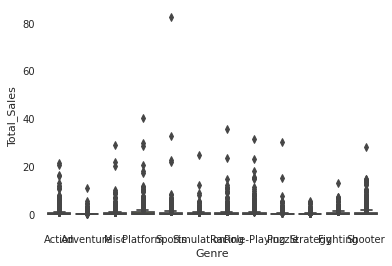

In [37]:
#이상치 검정 (시각화)
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.boxplot(x="Genre",y="Total_Sales",data=Total_Sales_by_Genre_raw)
plt.show()

In [38]:
#장르 전체로 봤을 때 median과 mean은 비슷하지만 한 장르내에 편차는 크구나 -> 장르별로 따봉이 하나씩 있다
Total_Sales_by_Genre_raw.groupby(by=['Genre']).describe().transpose

<bound method DataFrame.transpose of              Total_Sales                                                      
                   count      mean       std   min   25%    50%     75%    max
Genre                                                                         
Action            3305.0  0.526874  1.157157  0.01  0.07  0.190  0.5000  21.39
Adventure         1280.0  0.186305  0.514498  0.01  0.02  0.060  0.1600  11.18
Fighting           847.0  0.529398  0.956432  0.01  0.08  0.210  0.5500  13.04
Misc              1734.0  0.461200  1.302625  0.01  0.06  0.160  0.4100  29.01
Platform           884.0  0.939174  2.588174  0.01  0.09  0.275  0.8025  40.24
Puzzle             578.0  0.421228  1.566870  0.01  0.04  0.110  0.3075  30.26
Racing            1243.0  0.585511  1.665938  0.00  0.07  0.190  0.5300  35.83
Role-Playing      1483.0  0.610270  1.666957  0.01  0.07  0.180  0.5200  31.38
Shooter           1307.0  0.792563  1.819471  0.01  0.08  0.230  0.7300  28.31
Simulation     

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


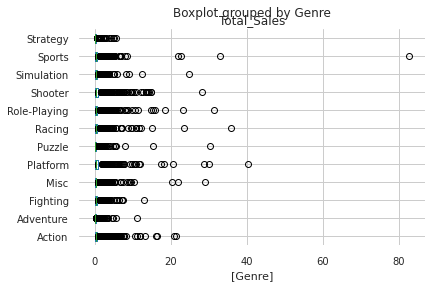

In [39]:
Total_Sales_by_Genre_raw.boxplot(column=["Total_Sales"], by=["Genre"],vert=0)
plt.show()

In [40]:
#큰 값 확인 (https://en.wikipedia.org/wiki/List_of_best-selling_video_games와 비교 -ok)
df2.sort_values(['Total_Sales'],ascending=False).head(20)

Name  ... Total_Sales
2908                                     Wii Sports  ...       82.74
4199                              Super Mario Bros.  ...       40.24
12579                                Mario Kart Wii  ...       35.83
3352                              Wii Sports Resort  ...       33.00
7829                       Pokemon Red/Pokemon Blue  ...       31.38
1203                                         Tetris  ...       30.26
6937                          New Super Mario Bros.  ...       30.01
3014                                       Wii Play  ...       29.01
16531                     New Super Mario Bros. Wii  ...       28.61
10488                                     Duck Hunt  ...       28.31
11137                                    Nintendogs  ...       24.75
10650                                 Mario Kart DS  ...       23.43
9416                    Pokemon Gold/Pokemon Silver  ...       23.09
3435                                        Wii Fit  ...       22.72
10899                                  Wii Fit Plus  ...       22.00
4343                             Kinect Adventures!  ...       21.82
3483                             Grand Theft Auto V  ...       21.39
14669                 Grand Theft Auto: San Andreas  ...       20.81
13111                             Super Mario World  ...       20.62
13229  Brain Age: Train Your Brain in Minutes a Day  ...       20.22

[20 rows x 10 columns]

In [41]:
df2['Total_Sales'].loc[df2['Publisher']=='Nintendo'].sum()/df2['Total_Sales'].sum()

0.20035622074021234

In [42]:
#작은 값 확인 -잘모르겠다 
df2.sort_values(['Total_Sales'],ascending=True).head(20)

Name  ... Total_Sales
5598    SCORE International Baja 1000: The Official Game  ...        0.00
16082                         Rondo of Swords (jp sales)  ...        0.01
12413                      Grooverider: Slot Car Thunder  ...        0.01
9171         Sega Golf Club: Miyazato San Kyoudai Naizou  ...        0.01
4214                                           Routes PE  ...        0.01
9176                 Nova Usagi no Game de Ryuugaku!? DS  ...        0.01
7437                   Broken Sword: The Sleeping Dragon  ...        0.01
11145                                          Inversion  ...        0.01
16076          Rabbids Invasion: The Interactive TV Show  ...        0.01
851                                    PGA European Tour  ...        0.01
16067                                     Bound By Flame  ...        0.01
4224                                   Kiniro no Corda 3  ...        0.01
9193                             FairlyLife: MiracleDays  ...        0.01
2311   Shinseiki Evangelion: Koutetsu no Girlfriend 2...  ...        0.01
6869                                Battle Engine Aquila  ...        0.01
4889                                 Transformers: Prime  ...        0.01
5457                                      Bakumatsu Rock  ...        0.01
10221                    Dinotopia: The Sunstone Odyssey  ...        0.01
14327                                   Myself; Yourself  ...        0.01
7390                                    LMA Manager 2007  ...        0.01

[20 rows x 10 columns]

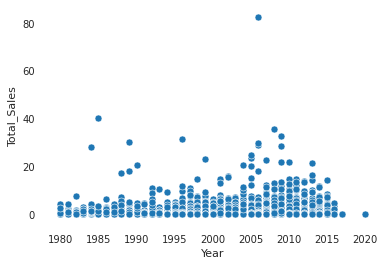

In [43]:
import numpy as np
#날짜 이상치 확인 및 정리 -df3=df2_goodyear 
df2.sort_values(['Year'],ascending=True)
#year 확인, 정상치  (1980-2020)
df2_year_unique=df2['Year'].unique()
np.sort(df2_year_unique)
# year 정상치 ( 1980- 2020 ) - df2_goodyear 16226/16596
df2_goodyear=df2.loc[(df2['Year']>=1980)&(df2['Year']<=2020)]
df2_goodyear.dtypes
df2.Total_Sales.sum()
#이상한 년도 df2_badyear 370/ 16596 (ea)-2.2%, 160/8915 - 1.7%
df2_badyear=df2[~df2.Year.isin(df2_goodyear.Year)]
df2_badyear.Total_Sales.sum()
#Scatter Plot
sns.scatterplot(data=df2_goodyear,x=df2_goodyear.Year,y=df2_goodyear.Total_Sales,)
df3=df2_goodyear

In [44]:
#PCA 로 이상치 확인 (Sales#)
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import numpy as np

scaler=StandardScaler()
Z=scaler.fit_transform(df3.iloc[:,5:])
pca=PCA(4)
pca.fit(Z)
df3_pca=pca.transform(Z)

In [45]:
num_components=len(pca.explained_variance_ratio_)
vals=pca.explained_variance_ratio_
ind=np.arange(num_components)
cumvals=np.cumsum(vals)

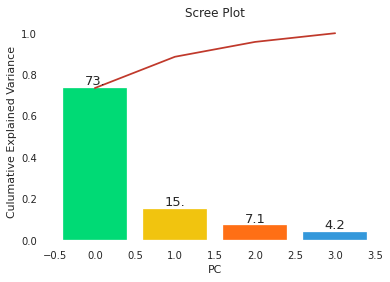

In [46]:
#PCA로 이상치 확인 (Scree plot- pc 개수 확인) -> 1개 혹은 2개 
#screeplot
import matplotlib.pyplot as plt
ax=plt.subplot()
#bar graph
ax.bar(ind,vals,color = ['#00da75', '#f1c40f',  '#ff6f15', '#3498db'])
#line graph
ax.plot(ind,cumvals,color='#c0392b')

for i in range(num_components):
  ax.annotate(r"%s"%((str(vals[i]*100)[:3])),(ind[i],vals[i]),va = "bottom", ha = "center", fontsize = 13)
plt.title('Scree Plot')
plt.xlabel('PC')
plt.ylabel('Culumative Explained Variance')

plt.show()

In [47]:
#pca_df만들기 -df_game_pca
df_game_pca=pd.DataFrame(df3_pca,columns=['pc1','pc2','pc3','pc4'])
df_game_pca=pd.concat([df3[['Name','Genre','Year','Publisher','Total_Sales']],df_game_pca,],axis=1,)
df_game_pca

Name  ...       pc4
0                        Candace Kane's Candy Factory  ...  0.004489
1                                      The Munchables  ...  0.099461
2      Otome wa Oanesama Boku ni Koi Shiteru Portable  ... -0.016669
3                    Deal or No Deal: Special Edition  ...  0.004489
4           Ben 10 Ultimate Alien: Cosmic Destruction  ... -0.020792
...                                               ...  ...       ...
16593                         Ice Age 2: The Meltdown  ...       NaN
16594                     Rainbow Islands: Revolution  ...       NaN
16595                                        NBA 2K16  ...       NaN
16596                     Toukiden: The Age of Demons  ...       NaN
16597                        The King of Fighters '95  ...       NaN

[16591 rows x 9 columns]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a fu

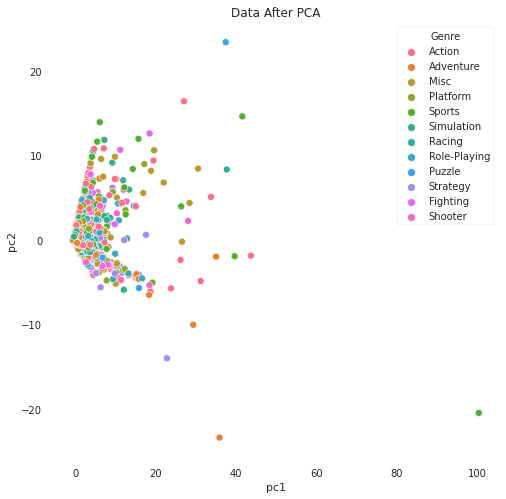

In [48]:
#시각화 (number of pc= 2) #데이터가 정규성을 띄지 않아 해석이 힘든듯..
import seaborn as sns
fig=plt.figure(figsize=(8,8))

ax1=fig.add_subplot(1,1,1)
ax2=fig.add_subplot(1,1,1)
ax3=fig.add_subplot(1,1,1)
ax4=fig.add_subplot(1,1,1)

ax1=sns.scatterplot(data=df_game_pca,x='pc1',y='pc2',hue='Genre')
#ax2=sns.scatterplot(data=df_game_pca,x='pc1',y='pc2',hue='Publisher')
#plt.subplot(142)
#ax3=sns.scatterplot(data=df_game_pca,x='pc1',y='pc2',hue='Year')
#plt.subplot(143)
#ax4=sns.scatterplot(data=df_game_pca,x='pc1',y='pc2',hue='Total_Sales')
#plt.subplot(144)
plt.title("Data After PCA")
plt.xlabel('pc1')
plt.ylabel('pc2')

plt.show()

In [49]:
df_game_pca.isna().sum()

Name           365
Genre          415
Year           365
Publisher      401
Total_Sales    365
pc1            365
pc2            365
pc3            365
pc4            365
dtype: int64

In [50]:
#clustering 용 df_game_pca사용-,nan drop후 df_game_pca2
df_game_pca
df_game_pca2=df_game_pca[["pc1","pc2","pc3"]].dropna()
df_game_pca2

pc1       pc2       pc3
0     -0.621824 -0.053153 -0.023297
1     -0.478494 -0.084570 -0.095774
2     -0.630687  0.007047  0.027389
3     -0.621824 -0.053153 -0.023297
4     -0.333324 -0.177682  0.037148
...         ...       ...       ...
16221 -0.445884 -0.096152 -0.087600
16222 -0.649028 -0.051088  0.001915
16223  0.353831 -0.348136  0.103219
16224 -0.130381  0.580643  0.281199
16225 -0.413382  0.386707  0.183649

[16226 rows x 3 columns]

In [51]:
#Elbow methods
from sklearn.cluster import KMeans
sum_of_squared_distances=[]
K=range(1,15)
for k in K:
  km=KMeans(n_clusters=k)
  km=km.fit(df_game_pca2)
  sum_of_squared_distances.append(km.inertia_)

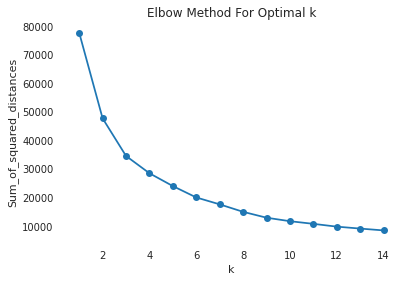

In [52]:
#Elbow method 시각화 -> 6
plt.plot(K,sum_of_squared_distances,"o-")
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [53]:
#K-means cluster 구하기 (6개)
kmeans=KMeans(n_clusters=6)
kmeans.fit(df_game_pca2)
labels=kmeans.labels_
print(labels)

cluster_center=kmeans.cluster_centers_
cluster_center

[1 1 1 ... 1 1 1]


array([[ 2.06127865e+00, -6.62215165e-01, -1.68831167e-01],
       [-3.57847565e-01, -4.86823884e-03, -3.60412782e-03],
       [ 2.92664164e+01,  3.92970815e+00, -6.59386442e-01],
       [ 2.79508931e+00,  3.78895257e+00,  8.75269207e-01],
       [ 1.00474069e+02, -2.04862433e+01, -6.79212102e+00],
       [ 1.00194469e+01, -1.27757591e+00,  4.58200863e-01]])

In [54]:
new_series=pd.Series(labels)
df_game_pca2['clusters']=new_series.values
df_game_pca2

pc1       pc2       pc3  clusters
0     -0.621824 -0.053153 -0.023297         1
1     -0.478494 -0.084570 -0.095774         1
2     -0.630687  0.007047  0.027389         1
3     -0.621824 -0.053153 -0.023297         1
4     -0.333324 -0.177682  0.037148         1
...         ...       ...       ...       ...
16221 -0.445884 -0.096152 -0.087600         1
16222 -0.649028 -0.051088  0.001915         1
16223  0.353831 -0.348136  0.103219         1
16224 -0.130381  0.580643  0.281199         1
16225 -0.413382  0.386707  0.183649         1

[16226 rows x 4 columns]

In [55]:
#get centroids
centroids=df_game_pca2.groupby(by=['clusters']).mean()
centroids

pc1        pc2       pc3
clusters                                 
0           2.057468  -0.660119 -0.169435
1          -0.358196  -0.004861 -0.003509
2          29.266416   3.929708 -0.659386
3           2.795089   3.788953  0.875269
4         100.474069 -20.486243 -6.792121
5          10.019447  -1.277576  0.458201

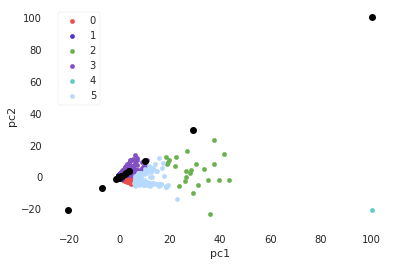

In [56]:
#K-means 시각화-완전 이상함...
colors = {0 : '#eb4d4b', 1 : '#4834d4', 2 : '#6ab04c',3:'#8250C4',4:'#5ECBC8',5:'#B5DAFE'}
fig, ax = plt.subplots()
ax.plot(centroids.iloc[0],centroids.iloc[0],'ok')
ax.plot(centroids.iloc[1],centroids.iloc[1],"ok")
ax.plot(centroids.iloc[2],centroids.iloc[2],"ok")
ax.plot(centroids.iloc[3],centroids.iloc[3],"ok")
ax.plot(centroids.iloc[4],centroids.iloc[4],"ok")
ax.plot(centroids.iloc[5],centroids.iloc[5],"ok")

grouped = df_game_pca2.groupby(by='clusters')
for key, group in grouped:
  group.plot(ax=ax,kind='scatter',x='pc1',y='pc2',label=key,color=colors[key])
plt.show()

필수 해결 과제
1.지역에 따라 선호하는 게임 장르가 다를까
2.연도별 게임의 트렌드가 있을까
3.출고량이 높은 게임에 대한 분석 및 시각화

In [57]:
#1. 지역에 따른 선호 게임 장르 --> 일본만 조금 다르다 그외는 1위 action 2위 sports, 3위 shooter
df3

Name  ... Total_Sales
0                        Candace Kane's Candy Factory  ...        0.04
1                                      The Munchables  ...        0.18
2      Otome wa Oanesama Boku ni Koi Shiteru Portable  ...        0.02
3                    Deal or No Deal: Special Edition  ...        0.04
4           Ben 10 Ultimate Alien: Cosmic Destruction  ...        0.25
...                                               ...  ...         ...
16593                         Ice Age 2: The Meltdown  ...        0.20
16594                     Rainbow Islands: Revolution  ...        0.01
16595                                        NBA 2K16  ...        0.79
16596                     Toukiden: The Age of Demons  ...        0.38
16597                        The King of Fighters '95  ...        0.17

[16226 rows x 10 columns]

In [58]:
Regional_Sales_by_Genre=pd.DataFrame(df3[['Genre','NA_Sales','EU_Sales','JP_Sales','Other_Sales']])
Regional_Sales_by_Genre.groupby(by='Genre').sum().sum()

NA_Sales       4285.66
EU_Sales       2380.29
JP_Sales       1258.24
Other_Sales     778.49
dtype: float64

In [59]:
#genre로 보기로 함 -df5
df5=df3
df5['Year_Bin']=np.digitize(df3['Year'],bins=[1980,1985,1990,1995,2000,2005,2010])
Sales_by_Year=df5.drop("Year",axis=1).groupby(by='Year_Bin').sum()
Sales_by_Year.columns


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Index(['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Total_Sales'], dtype='object')

In [60]:
pd.DataFrame(df5['Total_Sales'].describe())

Total_Sales
count  16226.000000
mean       0.539556
std        1.564166
min        0.000000
25%        0.060000
50%        0.170000
75%        0.480000
max       82.740000

In [61]:
Regional_Sales_by_Genre_sum=Regional_Sales_by_Genre.groupby(by='Genre').sum()
Regional_Sales_by_Genre_sum

NA_Sales  EU_Sales  JP_Sales  Other_Sales
Genre                                                  
Action          855.99    512.52    155.74       183.64
Adventure       101.46     63.37     51.81        16.64
Fighting        220.11     99.72     86.39        36.10
Misc            399.85    209.73    103.71        72.64
Platform        442.46    199.42    129.22        51.15
Puzzle          121.00     50.40     56.19        12.39
Racing          353.57    234.21     55.42        76.23
Role-Playing    307.08    176.32    336.25        54.71
Shooter         570.89    307.26     37.34       100.82
Simulation      181.04    112.86     63.46        31.24
Sports          664.33    369.68    134.58       131.73
Strategy         67.88     44.80     48.13        11.20

In [62]:
Total_Sales_by_Genre_raw.groupby(by='Genre').sum().sort_values(by="Total_Sales",ascending=False).head(10)

Total_Sales
Genre                    
Action            1741.32
Sports            1327.03
Shooter           1035.88
Role-Playing       905.03
Platform           830.23
Misc               799.72
Racing             727.79
Fighting           448.40
Simulation         391.49
Puzzle             243.47

In [63]:
#North America
NA_Genre=Regional_Sales_by_Genre_sum['NA_Sales'].sort_values(ascending=False)
NA_Genre.head(5),NA_Genre.head(5)/NA_Genre.head(5).sum()


(Genre
 Action      855.99
 Sports      664.33
 Shooter     570.89
 Platform    442.46
 Misc        399.85
 Name: NA_Sales, dtype: float64, Genre
 Action      0.291796
 Sports      0.226462
 Shooter     0.194609
 Platform    0.150829
 Misc        0.136304
 Name: NA_Sales, dtype: float64)

In [64]:
#일본
JP_Genre=Regional_Sales_by_Genre_sum['JP_Sales'].sort_values(ascending=False)
JP_Genre.head(5),JP_Genre.head(5)/JP_Genre.head(5).sum()


(Genre
 Role-Playing    336.25
 Action          155.74
 Sports          134.58
 Platform        129.22
 Misc            103.71
 Name: JP_Sales, dtype: float64, Genre
 Role-Playing    0.391216
 Action          0.181198
 Sports          0.156579
 Platform        0.150343
 Misc            0.120663
 Name: JP_Sales, dtype: float64)

In [65]:
#유럽
EU_Genre=Regional_Sales_by_Genre_sum['EU_Sales'].sort_values(ascending=False)
EU_Genre.head(5),EU_Genre.head(5)/EU_Genre.head(5).sum()

(Genre
 Action     512.52
 Sports     369.68
 Shooter    307.26
 Racing     234.21
 Misc       209.73
 Name: EU_Sales, dtype: float64, Genre
 Action     0.313775
 Sports     0.226325
 Shooter    0.188111
 Racing     0.143388
 Misc       0.128401
 Name: EU_Sales, dtype: float64)

In [66]:
#다른나라
Other_Genre=Regional_Sales_by_Genre_sum['Other_Sales'].sort_values(ascending=False)
Other_Genre.head(5),Other_Genre.head(5)/Other_Genre.head(5).sum()

(Genre
 Action     183.64
 Sports     131.73
 Shooter    100.82
 Racing      76.23
 Misc        72.64
 Name: Other_Sales, dtype: float64, Genre
 Action     0.324992
 Sports     0.233126
 Shooter    0.178424
 Racing     0.134906
 Misc       0.128553
 Name: Other_Sales, dtype: float64)

2.연도별 게임의 트렌드가 있을까 

In [67]:
df3_year_unique=df3['Year'].unique()
np.sort(df3_year_unique)

array([1980., 1981., 1982., 1983., 1984., 1985., 1986., 1987., 1988.,
       1989., 1990., 1991., 1992., 1993., 1994., 1995., 1996., 1997.,
       1998., 1999., 2000., 2001., 2002., 2003., 2004., 2005., 2006.,
       2007., 2008., 2009., 2010., 2011., 2012., 2013., 2014., 2015.,
       2016., 2017., 2020.])

In [68]:
#10년별로 binning
np.digitize(df3_year_unique,bins=[1980,1990,2000,2010,2020])

array([3, 3, 4, 3, 4, 3, 3, 3, 3, 4, 4, 3, 2, 4, 2, 3, 3, 1, 2, 4, 1, 2,
       2, 2, 4, 1, 1, 2, 2, 2, 2, 1, 1, 1, 1, 1, 4, 1, 5])

In [69]:
Sales_by_Year.columns

Index(['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Total_Sales'], dtype='object')

In [70]:
Sales_by_Year['Total_Sales']

Year_Bin
1     143.09
2     232.34
3     282.93
4     990.69
5    1695.93
6    2927.62
7    2482.23
Name: Total_Sales, dtype: float64

In [71]:
import matplotlib as mpl
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv 
!rm ~/.cache/matplotlib -rf
mpl.rc("font", family='NanumBarunGothic')
mpl.rc("font", family='AppleGothic')
 

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 40 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent cache directory
/root/.fontconfig: not cleaning non-existent cache directory
fc-cache: succeeded


findfont: Font family ['AppleGothic'] not found. Falling back to DejaVu Sans.


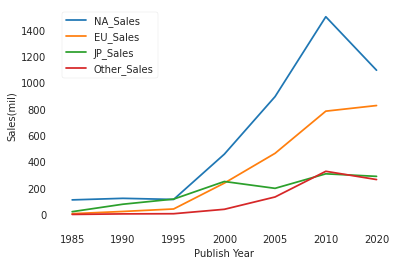

In [72]:
ax=plt.subplot()

ax.plot(Sales_by_Year.drop("Total_Sales",axis=1));

plt.xlabel('Publish Year',fontsize=10)
plt.ylabel('Sales(mil)',fontsize=10)
ax.set_xticklabels([1980,1985,1990,1995,2000,2005,2010,2020])

plt.legend(Sales_by_Year.columns);
plt.show()

In [73]:
df5.drop("Year",axis=1).groupby(by='Year_Bin').describe()

NA_Sales                           ... Total_Sales                      
            count      mean       std  min  ...         25%    50%     75%    max
Year_Bin                                    ...                                  
1           122.0  0.917623  2.533664  0.0  ...      0.3400  0.605  1.1275  28.31
2            82.0  1.508659  4.314253  0.0  ...      0.7725  1.265  2.1875  40.24
3           280.0  0.412000  1.130985  0.0  ...      0.1200  0.360  1.1625  20.62
4          1476.0  0.311145  0.743379  0.0  ...      0.1000  0.250  0.6200  31.38
5          3179.0  0.281988  0.562743  0.0  ...      0.0800  0.200  0.5300  20.81
6          5976.0  0.251479  0.858256  0.0  ...      0.0500  0.150  0.4300  82.74
7          5111.0  0.214580  0.608261  0.0  ...      0.0500  0.140  0.4100  21.82

[7 rows x 40 columns]

In [74]:
#해석 - 1980년대에는 표준편차가 아주 큼 -> 특정 top 게임이 차지하는 비중이 매우큼, 점점 한 게임의 독점이 아닌 여러 게임이 사랑을 나눠 가짐 

In [75]:
#1980년대 top 10 게임이 전체의 44% 차지 
df5.loc[df5.Year_Bin==1].sort_values(by="Total_Sales",ascending=False).head(10)

Name Platform    Year  ... Other_Sales Total_Sales  Year_Bin
10488        Duck Hunt      NES  1984.0  ...        0.47       28.31         1
5820           Pac-Man     2600  1982.0  ...        0.08        7.81         1
15885         Pitfall!     2600  1981.0  ...        0.05        4.50         1
5723         Asteroids     2600  1980.0  ...        0.05        4.31         1
6635        Excitebike      NES  1984.0  ...        0.07        4.16         1
5974              Golf      NES  1984.0  ...        0.04        4.00         1
466           Baseball      NES  1983.0  ...        0.02        3.20         1
15012  Missile Command     2600  1980.0  ...        0.03        2.76         1
10081      Mario Bros.      NES  1983.0  ...        0.02        2.28         1
1382           Frogger     2600  1981.0  ...        0.02        2.20         1

[10 rows x 11 columns]

In [76]:
p1=df5["Total_Sales"].loc[df5.Year_Bin==1].sort_values(ascending=False).head(10).sum()/df5["Total_Sales"].loc[df5.Year_Bin==1].sum()*100

In [77]:
p2=df5["Total_Sales"].loc[df5.Year_Bin==2].sort_values(ascending=False).head(10).sum()/df5["Total_Sales"].loc[df5.Year_Bin==2].sum()*100

In [78]:
p3=df5["Total_Sales"].loc[df5.Year_Bin==3].sort_values(ascending=False).head(10).sum()/df5["Total_Sales"].loc[df5.Year_Bin==3].sum()*100

In [79]:
p4=df5["Total_Sales"].loc[df5.Year_Bin==4].sort_values(ascending=False).head(10).sum()/df5["Total_Sales"].loc[df5.Year_Bin==4].sum()*100

In [80]:
p5=df5["Total_Sales"].loc[df5.Year_Bin==5].sort_values(ascending=False).head(10).sum()/df5["Total_Sales"].loc[df5.Year_Bin==5].sum()*100

In [81]:
p6=df5["Total_Sales"].loc[df5.Year_Bin==6].sort_values(ascending=False).head(10).sum()/df5["Total_Sales"].loc[df5.Year_Bin==6].sum()*100

In [82]:
p7=df5["Total_Sales"].loc[df5.Year_Bin==7].sort_values(ascending=False).head(10).sum()/df5["Total_Sales"].loc[df5.Year_Bin==7].sum()*100

findfont: Font family ['AppleGothic'] not found. Falling back to DejaVu Sans.


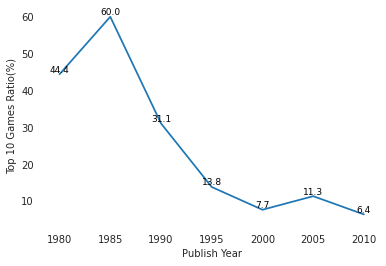

In [83]:
plist=[p1,p2,p3,p4,p5,p6,p7]
ylist=[1980,1985,1990,1995,2000,2005,2010]
plt.xlabel('Publish Year',fontsize=10)
plt.ylabel('Top 10 Games Ratio(%)',fontsize=10)
plt.plot(ylist,plist)
for i, v in enumerate(ylist):
    plt.text(v, round(plist[i],1), round(plist[i],1),fontsize = 9,color='black',horizontalalignment='center',verticalalignment='bottom')  
plt.show()

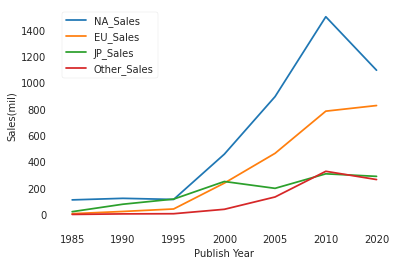

In [84]:
ax=plt.subplot()

ax.plot(Sales_by_Year.drop("Total_Sales",axis=1));

plt.xlabel('Publish Year',fontsize=10)
plt.ylabel('Sales(mil)',fontsize=10)
ax.set_xticklabels([1980,1985,1990,1995,2000,2005,2010,2020])

plt.legend(Sales_by_Year.columns);
plt.show()

In [85]:
#연도별 platfrom, genre 확인 
Year_bin_P_table=pd.crosstab(df5['Year_Bin'],columns=df5['Platform'],margins=True,margins_name="Total")
Year_bin_P_table

Platform  2600  3DO  3DS  DC    DS  GB  ...   Wii  WiiU  X360   XB  XOne  Total
Year_Bin                                ...                                    
1          103    0    0   0     0   0  ...     0     0     0    0     0    122
2           13    0    0   0     1  11  ...     0     0     0    0     0     82
3            0    1    0   0     0  22  ...     0     0     0    0     0    280
4            0    2    0  21     0  37  ...     0     0     0    0     0   1476
5            0    0    0  29    23  26  ...     0     0     0  554     0   3179
6            0    0    0   2  1584   0  ...   835     0   551  244     0   5976
7            0    0  496   0   509   0  ...   450   143   679    0   213   5111
Total      116    3  496  52  2117  96  ...  1285   143  1230  798   213  16226

[8 rows x 32 columns]

플랫폼이 다양화 됐다가 줄어듬 (GBA/GC도 없어짐 )
->ps , pc, wii xone, ds??

In [86]:
Year_bin_G_table=pd.crosstab(df5['Year_Bin'],columns=df5['Genre'],margins=True,margins_name="Total")
Year_bin_G_table

Genre     Action  Adventure  Fighting  ...  Sports  Strategy  Total
Year_Bin                               ...                         
1             52          1         1  ...       9         0    121
2             14          1         3  ...      13         0     82
3             19         11        40  ...      45        15    280
4            139         85       151  ...     258       106   1471
5            502        128       184  ...     590       126   3168
6           1071        502       256  ...     807       251   5957
7           1431        538       194  ...     566       167   5097
Total       3228       1266       829  ...    2288       665  16176

[8 rows x 13 columns]

findfont: Font family ['AppleGothic'] not found. Falling back to DejaVu Sans.


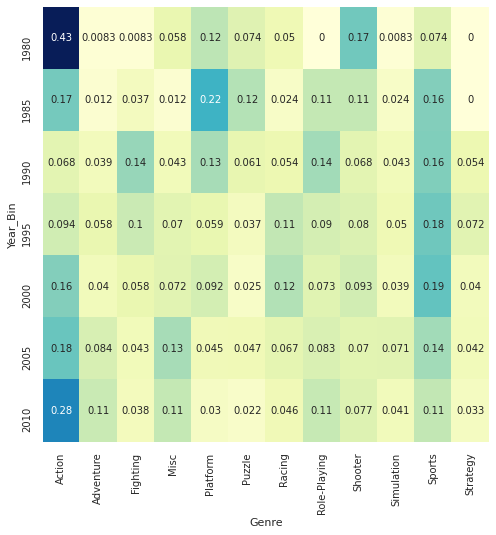

In [87]:
Year_bin_G_Ntable=pd.crosstab(df5['Year_Bin'],columns=df5['Genre'],margins=True,margins_name="Total",normalize='index')
fig, ax = plt.subplots(figsize=(8,8)) 
y_axis_labels = [1980,1985,1990,1995,'2000','2005','2010']
sns.heatmap(pd.crosstab(df5['Year_Bin'],columns=df5['Genre'],normalize='index'),cmap="YlGnBu", annot=True, cbar=False,yticklabels=y_axis_labels);


In [88]:
Year_bin_G_Ntable

Genre       Action  Adventure  Fighting  ...  Simulation    Sports  Strategy
Year_Bin                                 ...                                
1         0.429752   0.008264  0.008264  ...    0.008264  0.074380  0.000000
2         0.170732   0.012195  0.036585  ...    0.024390  0.158537  0.000000
3         0.067857   0.039286  0.142857  ...    0.042857  0.160714  0.053571
4         0.094494   0.057784  0.102651  ...    0.050306  0.175391  0.072060
5         0.158460   0.040404  0.058081  ...    0.038826  0.186237  0.039773
6         0.179788   0.084271  0.042975  ...    0.071177  0.135471  0.042135
7         0.280753   0.105552  0.038062  ...    0.040808  0.111046  0.032764
Total     0.199555   0.078264  0.051249  ...    0.052176  0.141444  0.041110

[8 rows x 12 columns]

genre - 최근 publish게임은 action에 대한 선호도가 커짐

In [89]:
Year_bin_Pu_table=pd.crosstab(df5['Year_Bin'],columns=df5['Publisher'])
Year_bin_Pu_table

Publisher  10TACLE Studios  1C Company  ...  mixi, Inc  responDESIGN
Year_Bin                                ...                         
1                        0           0  ...          0             0
2                        0           0  ...          0             0
3                        0           0  ...          0             0
4                        0           0  ...          0             0
5                        0           0  ...          0             1
6                        3           1  ...          0             1
7                        0           2  ...          1             0

[7 rows x 574 columns]

In [90]:
df5['Year_Bin'].loc[df5['Year_Bin']==1].groupby(by=df5['Publisher']).count().sort_values(ascending=False).head(10)

Publisher
Atari                           35
Activision                      19
Nintendo                        15
Mattel Interactive               8
Parker Bros.                     7
Coleco                           5
20th Century Fox Video Games     5
Imagic                           4
Namco Bandai Games               3
Tigervision                      3
Name: Year_Bin, dtype: int64

In [91]:
df5['Year_Bin'].loc[df5['Year_Bin']==2].groupby(by=df5['Publisher']).count().sort_values(ascending=False).head(10)

Publisher
Nintendo                        32
Namco Bandai Games               9
Capcom                           8
Atari                            7
Activision                       7
Konami Digital Entertainment     6
Hudson Soft                      4
SquareSoft                       3
Enix Corporation                 2
Palcom                           1
Name: Year_Bin, dtype: int64

In [92]:
df5['Year_Bin'].loc[df5['Year_Bin']==3].groupby(by=df5['Publisher']).count().sort_values(ascending=False).head(10)

Publisher
Nintendo                        47
Sega                            39
Namco Bandai Games              21
Konami Digital Entertainment    18
Capcom                          18
Hudson Soft                     11
SquareSoft                       9
Banpresto                        9
Acclaim Entertainment            8
Sony Computer Entertainment      7
Name: Year_Bin, dtype: int64

In [93]:
df5['Year_Bin'].loc[df5['Year_Bin']==4].groupby(by=df5['Publisher']).count().sort_values(ascending=False).head(10)

Publisher
Sony Computer Entertainment     148
Electronic Arts                 105
Konami Digital Entertainment    101
Nintendo                         77
Sega                             74
Acclaim Entertainment            69
Namco Bandai Games               53
GT Interactive                   45
Virgin Interactive               42
SquareSoft                       32
Name: Year_Bin, dtype: int64

In [94]:
df5['Year_Bin'].loc[df5['Year_Bin']==5].groupby(by=df5['Publisher']).count().sort_values(ascending=False).head(10)

Publisher
Electronic Arts                 330
THQ                             217
Konami Digital Entertainment    193
Ubisoft                         169
Activision                      166
Sony Computer Entertainment     161
Nintendo                        150
Atari                           136
Sega                            119
Acclaim Entertainment           107
Name: Year_Bin, dtype: int64

3.출고량이 높은 게임에 대한 분석 및 시각화

In [95]:
#출고량 높은게임
Top_Games=pd.DataFrame(df5.sort_values(by='Total_Sales',ascending=False).head(20))
Top_Games.reset_index(inplace=True,drop=True)
Top_Games

Name  ... Year_Bin
0                                     Wii Sports  ...        6
1                              Super Mario Bros.  ...        2
2                                 Mario Kart Wii  ...        6
3                              Wii Sports Resort  ...        6
4                       Pokemon Red/Pokemon Blue  ...        4
5                                         Tetris  ...        2
6                          New Super Mario Bros.  ...        6
7                                       Wii Play  ...        6
8                      New Super Mario Bros. Wii  ...        6
9                                      Duck Hunt  ...        1
10                                    Nintendogs  ...        6
11                                 Mario Kart DS  ...        6
12                   Pokemon Gold/Pokemon Silver  ...        4
13                                       Wii Fit  ...        6
14                                  Wii Fit Plus  ...        6
15                            Kinect Adventures!  ...        7
16                            Grand Theft Auto V  ...        7
17                 Grand Theft Auto: San Andreas  ...        5
18                             Super Mario World  ...        3
19  Brain Age: Train Your Brain in Minutes a Day  ...        6

[20 rows x 11 columns]

In [96]:
#시각화1 전체 sales에서 차지하는 비중
Top_Games['Total_Sales'].sum()/df5['Total_Sales'].sum()

0.06741878483077342

In [97]:
Top_Games_Genre=Top_Games.groupby(by='Genre')['Name'].count()
Top_Games_Genre

Genre
Action          2
Misc            3
Platform        4
Puzzle          1
Racing          2
Role-Playing    2
Shooter         1
Simulation      1
Sports          4
Name: Name, dtype: int64

findfont: Font family ['AppleGothic'] not found. Falling back to DejaVu Sans.


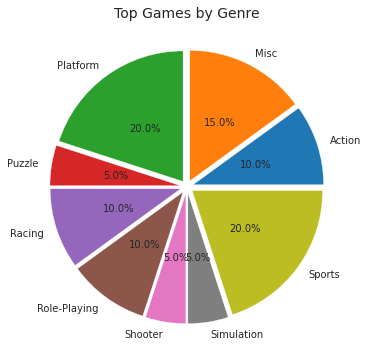

In [98]:
pie, ax = plt.subplots(figsize=[10,6])
labels = Top_Games_Genre.keys()
plt.pie(x=Top_Games_Genre, autopct="%.1f%%", explode=[0.05]*9, labels=labels, pctdistance=0.5)
plt.title("Top Games by Genre", fontsize=14);


In [99]:
Top_Games_Publisher=Top_Games.groupby(by='Publisher')['Name'].count()
Top_Games_Publisher

Publisher
Microsoft Game Studios     1
Nintendo                  17
Take-Two Interactive       2
Name: Name, dtype: int64

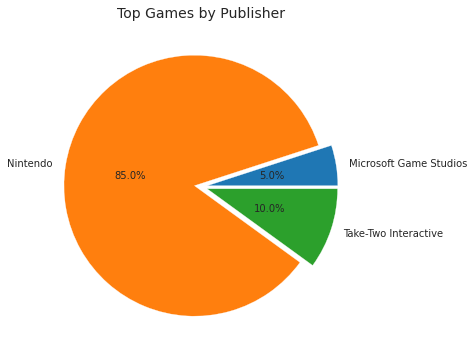

In [100]:
pie, ax = plt.subplots(figsize=[10,6])
labels = Top_Games_Publisher.keys()
plt.pie(x=Top_Games_Publisher, autopct="%.1f%%", explode=[0.05]*3, labels=labels, pctdistance=0.5)
plt.title("Top Games by Publisher", fontsize=14);

In [101]:
Top_Games_Platform=Top_Games.groupby(by='Platform')['Name'].count()
Top_Games_Platform

Platform
DS      4
GB      3
NES     2
PS2     1
PS3     1
SNES    1
Wii     7
X360    1
Name: Name, dtype: int64

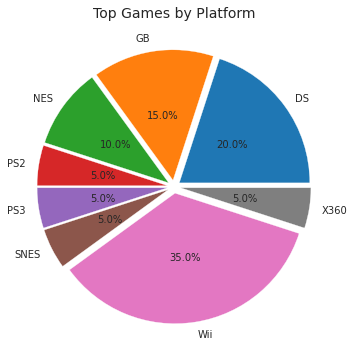

In [102]:
pie, ax = plt.subplots(figsize=[10,6])
labels = Top_Games_Platform.keys()
plt.pie(x=Top_Games_Platform, autopct="%.1f%%", explode=[0.05]*8, labels=labels, pctdistance=0.5)
plt.title("Top Games by Platform", fontsize=14);


In [103]:
Top_Games_Sales=Top_Games.iloc[:,5:10]
Top_Games_Sales

NA_Sales  EU_Sales  JP_Sales  Other_Sales  Total_Sales
0      41.49     29.02      3.77         8.46        82.74
1      29.08      3.58      6.81         0.77        40.24
2      15.85     12.88      3.79         3.31        35.83
3      15.75     11.01      3.28         2.96        33.00
4      11.27      8.89     10.22         1.00        31.38
5      23.20      2.26      4.22         0.58        30.26
6      11.38      9.23      6.50         2.90        30.01
7      14.03      9.20      2.93         2.85        29.01
8      14.59      7.06      4.70         2.26        28.61
9      26.93      0.63      0.28         0.47        28.31
10      9.07     11.00      1.93         2.75        24.75
11      9.81      7.57      4.13         1.92        23.43
12      9.00      6.18      7.20         0.71        23.09
13      8.94      8.03      3.60         2.15        22.72
14      9.09      8.59      2.53         1.79        22.00
15     14.97      4.94      0.24         1.67        21.82
16      7.01      9.27      0.97         4.14        21.39
17      9.43      0.40      0.41        10.57        20.81
18     12.78      3.75      3.54         0.55        20.62
19      4.75      9.26      4.16         2.05        20.22

In [104]:
Top_Games_Sales2=Top_Games_Sales.drop("Total_Sales",axis=1).sum(axis=0)

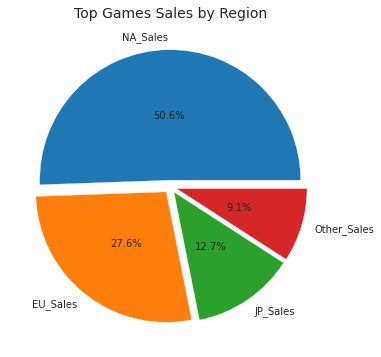

In [105]:
pie, ax = plt.subplots(figsize=[10,6])
labels = Top_Games_Sales2.keys()
plt.pie(x=Top_Games_Sales2, autopct="%.1f%%", explode=[0.05]*4, labels=labels, pctdistance=0.5)
plt.title("Top Games Sales by Region", fontsize=14);
# 미국 판매량이 제일 높음

top publisher 뺐을 때 genre와 platform 보겠음

In [106]:
Top_Publishers=pd.DataFrame(df5['Total_Sales'].groupby(by=df5['Publisher']).sum().sort_values(ascending=False).head(20))
Top_Publishers.reset_index(inplace=True)
Top_Publishers["(%)"]=round(Top_Publishers['Total_Sales']/df5['Total_Sales'].sum()*100,1)
Top_Publishers

Publisher  Total_Sales   (%)
0                                 Nintendo      1768.71  20.2
1                          Electronic Arts      1090.12  12.5
2                               Activision       720.78   8.2
3              Sony Computer Entertainment       598.61   6.8
4                                  Ubisoft       472.66   5.4
5                     Take-Two Interactive       396.75   4.5
6                                      THQ       338.99   3.9
7             Konami Digital Entertainment       278.09   3.2
8                                     Sega       269.90   3.1
9                       Namco Bandai Games       251.50   2.9
10                  Microsoft Game Studios       245.16   2.8
11                                  Capcom       199.41   2.3
12                                   Atari       145.26   1.7
13                             Square Enix       142.13   1.6
14  Warner Bros. Interactive Entertainment       141.88   1.6
15              Disney Interactive Studios       118.45   1.4
16                       Eidos Interactive        96.31   1.1
17                               LucasArts        82.14   0.9
18                      Bethesda Softworks        71.43   0.8
19                            Midway Games        69.13   0.8

In [107]:
Top_Publishers.columns

Index(['Publisher', 'Total_Sales', '(%)'], dtype='object')

In [108]:
Top_Publishers.Total_Sales.sum()/df5['Total_Sales'].sum()
#top 20개 회사가 85% 장악 
Top_Publishers.Total_Sales.sum(),df5['Total_Sales'].sum()

(7497.409999999997, 8754.830000000002)

In [109]:
List_of_Top_Publishers=Top_Publishers['Publisher']
List_of_Top_Publishers

0                                   Nintendo
1                            Electronic Arts
2                                 Activision
3                Sony Computer Entertainment
4                                    Ubisoft
5                       Take-Two Interactive
6                                        THQ
7               Konami Digital Entertainment
8                                       Sega
9                         Namco Bandai Games
10                    Microsoft Game Studios
11                                    Capcom
12                                     Atari
13                               Square Enix
14    Warner Bros. Interactive Entertainment
15                Disney Interactive Studios
16                         Eidos Interactive
17                                 LucasArts
18                        Bethesda Softworks
19                              Midway Games
Name: Publisher, dtype: object

In [110]:
#TOP  아닌 애들이 만든 게임 df - The_Rest_df
The_Rest_df=df5[~df5.Publisher.isin(Top_Publishers.Publisher)]
The_Rest_df.Publisher.unique().size
#df2_badyear=df2[~df2.Year.isin(df2_goodyear.Year)] #참고코드
#The_Rest[The_Rest['Publisher']=='Nintendo'].count() #검정 ok

555

In [111]:
List_of_the_Rest=The_Rest_df['Publisher']
List_of_the_Rest

0                Destineer
2                Alchemist
3                Zoo Games
4              D3Publisher
6              Deep Silver
               ...        
16590            Aqua Plus
16592               Zenrin
16593        Vivendi Games
16594    Rising Star Games
16596           Tecmo Koei
Name: Publisher, Length: 6057, dtype: object

In [112]:
#전체 publishser 개수- 575 / top 85% 차지하는 publisher 20개/ rest 555개 /게임개수 10169 vs 6057
df5['Publisher'].unique().size

575

In [113]:
#Top_Publishsers 가 만든 게임 df -Top_Publishers_Games_df
Top_Publishers_Games_df=df5[df5.Publisher.isin(Top_Publishers.Publisher)]
Top_Publishers_Games_df.size

111859

In [114]:
Top_Publishers_Games_df['Genre']
The_Rest_df['Genre']

0            Action
2         Adventure
3              Misc
4          Platform
6        Simulation
            ...    
16590     Adventure
16592          Misc
16593      Platform
16594        Action
16596        Action
Name: Genre, Length: 6057, dtype: object

In [115]:
#total sales 순위별로 indexing - df6
#df5.sort_values(by=df5['Total_Sales'],ascending=False).head(10)
df5['Total_Sales'].duplicated().sum()

15222

In [116]:
hist_df=df3['Total_Sales']

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


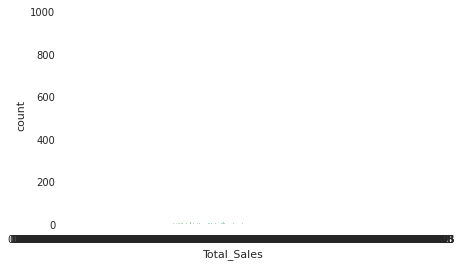

In [117]:
sns.countplot(hist_df)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


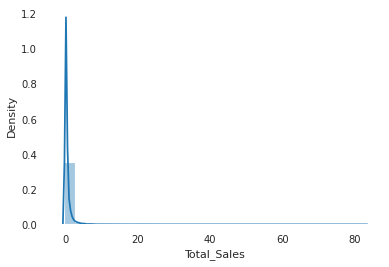

In [118]:
sns.distplot(hist_df, bins=30, kde=True,)

In [119]:
Top1200=pd.DataFrame(df5.sort_values(by='Total_Sales',ascending=False).head(1200))

In [120]:
Top1200.describe()

Year     NA_Sales  ...  Total_Sales     Year_Bin
count  1200.000000  1200.000000  ...  1200.000000  1200.000000
mean   2004.848333     1.857508  ...     3.815900     5.516667
std       7.183082     2.433057  ...     4.494824     1.404053
min    1980.000000     0.000000  ...     1.530000     1.000000
25%    2001.000000     0.860000  ...     1.880000     5.000000
50%    2006.000000     1.320000  ...     2.520000     6.000000
75%    2010.000000     2.030000  ...     3.920000     7.000000
max    2016.000000    41.490000  ...    82.740000     7.000000

[8 rows x 7 columns]

In [121]:
1.53

1.53

In [122]:
Top1200.groupby("Year").count()

Name  Platform  Genre  ...  Other_Sales  Total_Sales  Year_Bin
Year                           ...                                    
1980.0     2         2      2  ...            2            2         2
1981.0     6         6      6  ...            6            6         6
1982.0     3         3      3  ...            3            3         3
1983.0     3         3      3  ...            3            3         3
1984.0     5         5      5  ...            5            5         5
1985.0     3         3      3  ...            3            3         3
1986.0     9         9      9  ...            9            9         9
1987.0     5         5      5  ...            5            5         5
1988.0     7         7      7  ...            7            7         7
1989.0     9         9      9  ...            9            9         9
1990.0     8         8      8  ...            8            8         8
1991.0     7         7      7  ...            7            7         7
1992.0    16        16     16  ...           16           16        16
1993.0     8         8      8  ...            8            8         8
1994.0    13        13     13  ...           13           13        13
1995.0    13        13     13  ...           13           13        13
1996.0    24        24     24  ...           24           24        24
1997.0    28        28     28  ...           28           28        28
1998.0    42        42     42  ...           42           42        42
1999.0    33        33     32  ...           33           33        33
2000.0    32        32     32  ...           32           32        32
2001.0    63        63     62  ...           63           63        63
2002.0    58        58     58  ...           58           58        58
2003.0    54        54     54  ...           54           54        54
2004.0    58        58     57  ...           58           58        58
2005.0    47        47     47  ...           47           47        47
2006.0    54        54     53  ...           54           54        54
2007.0    82        82     82  ...           82           82        82
2008.0    90        90     90  ...           90           90        90
2009.0    70        70     70  ...           70           70        70
2010.0    74        74     73  ...           74           74        74
2011.0    65        65     65  ...           65           65        65
2012.0    46        46     46  ...           46           46        46
2013.0    61        61     60  ...           61           61        61
2014.0    51        51     51  ...           51           51        51
2015.0    43        43     42  ...           43           43        43
2016.0     8         8      8  ...            8            8         8

[37 rows x 10 columns]

In [123]:
#2000년대 이후 출시된 게임 top 1200 - Top1200_new
Top1200_new=pd.DataFrame(df5[df5.Year>=2000].sort_values(by='Total_Sales',ascending=False).head(1200))

In [124]:
Top1200_new_The_Whales=Top1200_new.loc[~Top1200_new['Publisher'].isin(List_of_the_Rest)]
Top1200_new_The_Whales

Name  ... Year_Bin
2908                                       Wii Sports  ...        6
12579                                  Mario Kart Wii  ...        6
3352                                Wii Sports Resort  ...        6
6937                            New Super Mario Bros.  ...        6
3014                                         Wii Play  ...        6
...                                               ...  ...      ...
8345                            Need for Speed Carbon  ...        6
1240                                       Watch Dogs  ...        7
11143                 Tom Clancy's Rainbow Six: Siege  ...        7
3364                          Rise of the Tomb Raider  ...        7
12003  Mega Man Battle Network 3 Blue / White Version  ...        5

[1128 rows x 11 columns]

In [125]:
#2000년대 이후 출시 게임 리스트 all df7
df7=df5[df5['Year']>=2000]
df7

Name  ... Year_Bin
0                        Candace Kane's Candy Factory  ...        6
1                                      The Munchables  ...        6
2      Otome wa Oanesama Boku ni Koi Shiteru Portable  ...        7
3                    Deal or No Deal: Special Edition  ...        7
4           Ben 10 Ultimate Alien: Cosmic Destruction  ...        7
...                                               ...  ...      ...
16592                                Minna no Chizu 2  ...        6
16593                         Ice Age 2: The Meltdown  ...        6
16594                     Rainbow Islands: Revolution  ...        6
16595                                        NBA 2K16  ...        7
16596                     Toukiden: The Age of Demons  ...        7

[14266 rows x 11 columns]

In [126]:
#2000년대 이후 출시된 게임중 탑 1200 - New_Top1200
New_Top1200=df7.sort_values(by='Total_Sales',ascending=False).head(1200)
New_Top1200

Name  ... Year_Bin
2908                                          Wii Sports  ...        6
12579                                     Mario Kart Wii  ...        6
3352                                   Wii Sports Resort  ...        6
6937                               New Super Mario Bros.  ...        6
3014                                            Wii Play  ...        6
...                                                  ...  ...      ...
1240                                          Watch Dogs  ...        7
11143                    Tom Clancy's Rainbow Six: Siege  ...        7
3364                             Rise of the Tomb Raider  ...        7
12003     Mega Man Battle Network 3 Blue / White Version  ...        5
1167   Pirates of the Caribbean: The Curse of the Bla...  ...        5

[1200 rows x 11 columns]

In [127]:
#중요!! 2000 년대 이후 출시된 게임 중 top 1200중 whale/ the rest
New_Top1200_Whales=New_Top1200[~New_Top1200['Publisher'].isin(List_of_the_Rest)]
New_Top1200_Rest=New_Top1200[New_Top1200['Publisher'].isin(List_of_the_Rest)]
New_Top1200_Rest.groupby("Genre").sum()

Year  NA_Sales  EU_Sales  ...  Other_Sales  Total_Sales  Year_Bin
Genre                                      ...                                    
Action        24124.0     10.48      8.49  ...         2.96        26.80        79
Adventure      2015.0      0.44      0.89  ...         0.25         1.63         7
Misc          28115.0     20.00      7.56  ...         3.18        31.82        86
Platform      16027.0      7.89      7.09  ...         1.61        17.25        42
Puzzle         2009.0      0.80      0.43  ...         0.13         1.37         6
Racing        18027.0      5.89      8.84  ...         2.52        17.98        47
Role-Playing  18049.0      4.62      1.74  ...         0.47        22.38        51
Shooter       10030.0      6.14      2.19  ...         0.65         9.09        29
Simulation    12034.0      9.94      6.13  ...         1.80        18.87        34
Sports        12045.0     10.29      4.84  ...         1.64        16.77        37

[10 rows x 7 columns]

In [128]:
New_Top1200_Rest.groupby("Genre").sum()/New_Top1200.groupby("Genre").sum()

Year  NA_Sales  EU_Sales  ...  Other_Sales  Total_Sales  Year_Bin
Genre                                       ...                                    
Action        0.046200  0.027528  0.032043  ...     0.028743     0.033771  0.048826
Adventure     0.050186  0.020352  0.053550  ...     0.050302     0.035714  0.057377
Fighting           NaN       NaN       NaN  ...          NaN          NaN       NaN
Misc          0.126171  0.106741  0.064665  ...     0.080834     0.083980  0.127596
Platform      0.088754  0.051224  0.077648  ...     0.062018     0.054571  0.079848
Puzzle        0.043536  0.031962  0.018566  ...     0.025097     0.020639  0.044444
Racing        0.097664  0.042918  0.079297  ...     0.057260     0.056973  0.087523
Role-Playing  0.071907  0.029523  0.018632  ...     0.016961     0.055984  0.066406
Shooter       0.029538  0.018530  0.011101  ...     0.009453     0.014868  0.027002
Simulation    0.113158  0.143642  0.092319  ...     0.119048     0.110435  0.108974
Sports        0.033520  0.035046  0.023590  ...     0.020825     0.027497  0.034259
Strategy           NaN       NaN       NaN  ...          NaN          NaN       NaN

[12 rows x 7 columns]

In [129]:
df5[df5['Genre']=='Misc'].sort_values(by='Total_Sales',ascending=False)

Name  ... Year_Bin
3014                                            Wii Play  ...        6
4343                                  Kinect Adventures!  ...        7
13229       Brain Age: Train Your Brain in Minutes a Day  ...        6
223                                         Just Dance 3  ...        7
9230                                        Just Dance 2  ...        7
...                                                  ...  ...      ...
9437   Rakushou! Pachi-Slot Sengen 6: Rio 2 Cruising ...  ...        6
9176                 Nova Usagi no Game de Ryuugaku!? DS  ...        6
9015                            Art Academy: Home Studio  ...        7
4312          Cabbage Patch Kids: The Patch Puppy Rescue  ...        6
7762                           Idol Janshi Suchie-Pai IV  ...        6

[1695 rows x 11 columns]

전체 데이터에서 top 1200 먼저 고르고, 2000년이후로 분류 - 10% (1900)
Top1200_new

In [131]:
#2000 년대 이후로 봤을 때 1200 
Top1200_new_The_Whales['Total_Sales'].sum()/Top1200_new['Total_Sales'].sum()

0.9575076744209764

In [132]:
Top1200['Total_Sales'].sum()/df5['Total_Sales'].sum()

0.5230347134096264

In [133]:
Top1200_The_Whales=Top1200.loc[~Top1200['Publisher'].isin(List_of_the_Rest)]

In [134]:
Top1200_The_Whales.describe()

Year     NA_Sales  ...  Total_Sales     Year_Bin
count  1096.000000  1096.000000  ...  1096.000000  1096.000000
mean   2005.217153     1.914617  ...     3.919425     5.591241
std       7.045081     2.522852  ...     4.673245     1.373884
min    1980.000000     0.000000  ...     1.530000     1.000000
25%    2001.000000     0.870000  ...     1.890000     5.000000
50%    2007.000000     1.325000  ...     2.580000     6.000000
75%    2010.000000     2.072500  ...     4.050000     7.000000
max    2016.000000    41.490000  ...    82.740000     7.000000

[8 rows x 7 columns]

In [135]:
Top1200.groupby("Year").count()

Name  Platform  Genre  ...  Other_Sales  Total_Sales  Year_Bin
Year                           ...                                    
1980.0     2         2      2  ...            2            2         2
1981.0     6         6      6  ...            6            6         6
1982.0     3         3      3  ...            3            3         3
1983.0     3         3      3  ...            3            3         3
1984.0     5         5      5  ...            5            5         5
1985.0     3         3      3  ...            3            3         3
1986.0     9         9      9  ...            9            9         9
1987.0     5         5      5  ...            5            5         5
1988.0     7         7      7  ...            7            7         7
1989.0     9         9      9  ...            9            9         9
1990.0     8         8      8  ...            8            8         8
1991.0     7         7      7  ...            7            7         7
1992.0    16        16     16  ...           16           16        16
1993.0     8         8      8  ...            8            8         8
1994.0    13        13     13  ...           13           13        13
1995.0    13        13     13  ...           13           13        13
1996.0    24        24     24  ...           24           24        24
1997.0    28        28     28  ...           28           28        28
1998.0    42        42     42  ...           42           42        42
1999.0    33        33     32  ...           33           33        33
2000.0    32        32     32  ...           32           32        32
2001.0    63        63     62  ...           63           63        63
2002.0    58        58     58  ...           58           58        58
2003.0    54        54     54  ...           54           54        54
2004.0    58        58     57  ...           58           58        58
2005.0    47        47     47  ...           47           47        47
2006.0    54        54     53  ...           54           54        54
2007.0    82        82     82  ...           82           82        82
2008.0    90        90     90  ...           90           90        90
2009.0    70        70     70  ...           70           70        70
2010.0    74        74     73  ...           74           74        74
2011.0    65        65     65  ...           65           65        65
2012.0    46        46     46  ...           46           46        46
2013.0    61        61     60  ...           61           61        61
2014.0    51        51     51  ...           51           51        51
2015.0    43        43     42  ...           43           43        43
2016.0     8         8      8  ...            8            8         8

[37 rows x 10 columns]

In [136]:
Top1200_The_Rest=Top1200.loc[Top1200['Publisher'].isin(List_of_the_Rest)]

In [153]:
Top1200_The_Rest.sort_values(by='Total_Sales',ascending=False).sum()

Name           Final Fantasy VIIIZumba FitnessDriverThe Last ...
Platform       PSWiiPSPS3PSDSPS2PSPS2PSPS2PSPSNESPCPS4NESPSPC...
Year                                                      208100
Publisher      SquareSoft505 GamesGT InteractiveSony Computer...
NA_Sales                                                  130.59
EU_Sales                                                   72.79
JP_Sales                                                   62.03
Other_Sales                                                17.98
Total_Sales                                               283.39
Year_Bin                                                     492
dtype: object

In [138]:
Top1200_The_Rest.describe()

Year    NA_Sales  ...  Total_Sales    Year_Bin
count   104.000000  104.000000  ...   104.000000  104.000000
mean   2000.961538    1.255673  ...     2.724904    4.730769
std       7.501357    0.919667  ...     1.301408    1.482786
min    1981.000000    0.000000  ...     1.550000    1.000000
25%    1996.000000    0.627500  ...     1.777500    4.000000
50%    2000.500000    1.230000  ...     2.285000    5.000000
75%    2006.250000    1.732500  ...     3.132500    6.000000
max    2016.000000    4.030000  ...     7.860000    7.000000

[8 rows x 7 columns]

In [139]:
Top1200_The_Rest.groupby('Year').count()

Name  Platform  Genre  ...  Other_Sales  Total_Sales  Year_Bin
Year                           ...                                    
1981.0     2         2      2  ...            2            2         2
1987.0     1         1      1  ...            1            1         1
1988.0     1         1      1  ...            1            1         1
1989.0     1         1      1  ...            1            1         1
1990.0     1         1      1  ...            1            1         1
1991.0     1         1      1  ...            1            1         1
1992.0     5         5      5  ...            5            5         5
1993.0     3         3      3  ...            3            3         3
1994.0     5         5      5  ...            5            5         5
1995.0     2         2      2  ...            2            2         2
1996.0     5         5      5  ...            5            5         5
1997.0     9         9      9  ...            9            9         9
1998.0     8         8      8  ...            8            8         8
1999.0     6         6      5  ...            6            6         6
2000.0     2         2      2  ...            2            2         2
2001.0     7         7      6  ...            7            7         7
2002.0     6         6      6  ...            6            6         6
2003.0     4         4      4  ...            4            4         4
2004.0     4         4      4  ...            4            4         4
2005.0     2         2      2  ...            2            2         2
2006.0     3         3      3  ...            3            3         3
2007.0     4         4      4  ...            4            4         4
2009.0     4         4      4  ...            4            4         4
2010.0     3         3      3  ...            3            3         3
2011.0     5         5      5  ...            5            5         5
2012.0     1         1      1  ...            1            1         1
2013.0     3         3      3  ...            3            3         3
2014.0     3         3      3  ...            3            3         3
2015.0     2         2      2  ...            2            2         2
2016.0     1         1      1  ...            1            1         1

[30 rows x 10 columns]

In [140]:
Top1200.groupby('Genre').sum()

Year  NA_Sales  EU_Sales  ...  Other_Sales  Total_Sales  Year_Bin
Genre                                       ...                                    
Action        483477.0    406.60    273.91  ...        98.92       836.89      1397
Adventure      44053.0     30.69     23.64  ...         5.10        67.06       111
Fighting      130134.0    103.59     46.87  ...        16.27       197.39       323
Misc          210646.0    192.26    115.71  ...        35.17       387.08       610
Platform      236116.0    297.55    133.00  ...        31.93       558.94       562
Puzzle         61976.0     66.84     28.15  ...         6.08       127.63       137
Racing        182308.0    169.79    124.32  ...        42.19       374.21       476
Role-Playing  246666.0    183.10    114.01  ...        29.94       495.87       691
Shooter       305137.0    368.82    191.92  ...        65.12       640.96       911
Simulation    108271.0     76.52     66.92  ...        14.57       181.10       301
Sports        344955.0    292.13    201.97  ...        75.32       622.67       967
Strategy       38031.0     28.29     14.56  ...         2.77        51.28        93

[12 rows x 7 columns]

In [141]:
Top1200_The_Whales.groupby('Genre').sum()

Year  NA_Sales  EU_Sales  ...  Other_Sales  Total_Sales  Year_Bin
Genre                                       ...                                    
Action        447417.0    377.35    258.34  ...        94.25       779.60      1304
Adventure      38047.0     28.71     19.14  ...         4.75        60.18        97
Fighting      120157.0     94.44     43.97  ...        15.81       184.88       305
Misc          188570.0    174.88    108.30  ...        32.38       358.42       545
Platform      218107.0    287.02    124.32  ...        30.11       537.13       519
Puzzle         57987.0     64.74     27.91  ...         6.00       123.52       130
Racing        168307.0    165.57    113.51  ...        40.17       356.45       444
Role-Playing  206731.0    172.83    110.54  ...        29.14       436.65       612
Shooter       289138.0    354.32    188.08  ...        64.38       621.68       875
Simulation     94245.0     65.38     59.95  ...        12.67       160.09       264
Sports        324928.0    276.59    195.81  ...        73.37       596.76       916
Strategy       34036.0     25.37     13.22  ...         2.63        46.88        85

[12 rows x 7 columns]

In [142]:
#top1200 The rest의 장르/ 플랫폼 -Top1200_The_Rest #Role Playing, Action
Top1200_The_Rest.groupby('Genre').sum()

Year  NA_Sales  EU_Sales  ...  Other_Sales  Total_Sales  Year_Bin
Genre                                      ...                                    
Action        36060.0     29.25     15.57  ...         4.67        57.29        93
Adventure      6006.0      1.98      4.50  ...         0.35         6.88        14
Fighting       9977.0      9.15      2.90  ...         0.46        12.51        18
Misc          22076.0     17.38      7.41  ...         2.79        28.66        65
Platform      18009.0     10.53      8.68  ...         1.82        21.81        43
Puzzle         3989.0      2.10      0.24  ...         0.08         4.11         7
Racing        14001.0      4.22     10.81  ...         2.02        17.76        32
Role-Playing  39935.0     10.27      3.47  ...         0.80        59.22        79
Shooter       15999.0     14.50      3.84  ...         0.74        19.28        36
Simulation    14026.0     11.14      6.97  ...         1.90        21.01        37
Sports        20027.0     15.54      6.16  ...         1.95        25.91        51
Strategy       3995.0      2.92      1.34  ...         0.14         4.40         8

[12 rows x 7 columns]

In [143]:
#top1200에서 the rest 비중보기 
Top1200_The_Rest.groupby('Genre').sum()/Top1200.groupby('Genre').sum()

Year  NA_Sales  EU_Sales  ...  Other_Sales  Total_Sales  Year_Bin
Genre                                       ...                                    
Action        0.074585  0.071938  0.056843  ...     0.047210     0.068456  0.066571
Adventure     0.136336  0.064516  0.190355  ...     0.068627     0.102595  0.126126
Fighting      0.076667  0.088329  0.061873  ...     0.028273     0.063377  0.055728
Misc          0.104801  0.090398  0.064039  ...     0.079329     0.074042  0.106557
Platform      0.076272  0.035389  0.065263  ...     0.057000     0.039020  0.076512
Puzzle        0.064364  0.031418  0.008526  ...     0.013158     0.032202  0.051095
Racing        0.076799  0.024854  0.086953  ...     0.047879     0.047460  0.067227
Role-Playing  0.161899  0.056090  0.030436  ...     0.026720     0.119426  0.114327
Shooter       0.052432  0.039315  0.020008  ...     0.011364     0.030080  0.039517
Simulation    0.129545  0.145583  0.104154  ...     0.130405     0.116013  0.122924
Sports        0.058057  0.053195  0.030500  ...     0.025890     0.041611  0.052740
Strategy      0.105046  0.103217  0.092033  ...     0.050542     0.085803  0.086022

[12 rows x 7 columns]

In [144]:
#platform
Top1200.groupby('Platform').sum()

Year  NA_Sales  EU_Sales  ...  Other_Sales  Total_Sales  Year_Bin
Platform                                ...                                    
2600       21792.0     29.97      1.85  ...         0.35        32.17        11
3DS        62402.0     45.54     35.30  ...         7.53       141.36       217
DC          3998.0      2.36      1.12  ...         0.16         4.22         9
DS        168623.0    143.88    122.96  ...        32.29       390.33       511
GB         73822.0    106.20     44.16  ...         7.69       218.80       132
GBA        76092.0     63.47     29.69  ...         4.10       119.21       193
GC         46062.0     39.15     12.60  ...         1.91        65.22       119
GEN        15937.0     16.32      4.74  ...         0.77        22.90        24
N64        65940.0     71.64     23.99  ...         2.19       120.28       140
NES        77481.0    110.48     17.73  ...         4.75       193.20        75
PC         84115.0     60.90     52.64  ...         7.27       120.98       215
PS        205808.0    165.29    107.26  ...        16.57       337.21       432
PS2       398696.0    295.75    174.78  ...       103.07       621.06      1051
PS3       275396.0    204.56    195.20  ...        79.51       504.47       904
PS4       110796.0     66.65     90.42  ...        30.92       194.06       385
PSP        42146.0     22.06     20.02  ...        12.44        69.58       127
PSV         6037.0      1.67      2.06  ...         0.89         5.69        21
SAT         1995.0      0.34      0.26  ...         0.03         1.93         4
SNES       59786.0     53.72     17.49  ...         2.94       123.07        97
Wii       188823.0    273.81    180.19  ...        50.39       552.33       595
WiiU       22149.0     18.63     10.90  ...         3.11        40.93        77
X360      301471.0    350.27    162.82  ...        50.12       567.84       984
XB         42065.0     39.55     11.92  ...         1.70        53.70       108
XOne       54386.0     46.80     24.92  ...         6.61        78.54       189

[24 rows x 7 columns]

In [145]:
Top1200_The_Whales.groupby('Platform').sum()

Year  NA_Sales  EU_Sales  ...  Other_Sales  Total_Sales  Year_Bin
Platform                                ...                                    
2600       17830.0     25.92      1.61  ...         0.31        27.84         9
3DS        58373.0     45.54     35.30  ...         7.53       136.40       203
DC          3998.0      2.36      1.12  ...         0.16         4.22         9
DS        158587.0    136.47    117.62  ...        30.80       375.84       481
GB         71821.0    106.20     44.16  ...         7.69       217.24       127
GBA        66082.0     58.04     27.02  ...         3.73       109.85       168
GC         44060.0     37.68     12.12  ...         1.85        63.16       114
GEN        11953.0     12.62      3.86  ...         0.63        18.18        18
N64        61945.0     69.81     22.62  ...         2.07       116.83       132
NES        69527.0    106.77     17.29  ...         4.70       179.48        66
PC         64136.0     44.44     43.56  ...         6.38        94.38       175
PS        157861.0    129.92     86.31  ...        12.54       257.25       334
PS2       364644.0    275.39    161.24  ...        98.41       577.18       962
PS3       269361.0    200.24    191.54  ...        77.94       494.47       883
PS4       102738.0     63.82     86.25  ...        29.61       185.14       357
PSP        42146.0     22.06     20.02  ...        12.44        69.58       127
PSV         4023.0      1.39      1.27  ...         0.57         3.43        14
SAT         1995.0      0.34      0.26  ...         0.03         1.93         4
SNES       39854.0     49.35     16.55  ...         2.61        99.87        65
Wii       176768.0    262.60    174.95  ...        48.74       534.18       557
WiiU       22149.0     18.63     10.90  ...         3.11        40.93        77
X360      291416.0    342.48    159.82  ...        49.17       556.07       949
XB         42065.0     39.55     11.92  ...         1.70        53.70       108
XOne       54386.0     46.80     24.92  ...         6.61        78.54       189

[24 rows x 7 columns]

In [146]:
Top1200_The_Rest.groupby('Platform').sum()

Year  NA_Sales  EU_Sales  ...  Other_Sales  Total_Sales  Year_Bin
Platform                               ...                                    
2600       3962.0      4.05      0.24  ...         0.04         4.33         2
3DS        4029.0      0.00      0.00  ...         0.00         4.96        14
DS        10036.0      7.41      5.34  ...         1.49        14.49        30
GB         2001.0      0.00      0.00  ...         0.00         1.56         5
GBA       10010.0      5.43      2.67  ...         0.37         9.36        25
GC         2002.0      1.47      0.48  ...         0.06         2.06         5
GEN        3984.0      3.70      0.88  ...         0.14         4.72         6
N64        3995.0      1.83      1.37  ...         0.12         3.45         8
NES        7954.0      3.71      0.44  ...         0.05        13.72         9
PC        19979.0     16.46      9.08  ...         0.89        26.60        40
PS        47947.0     35.37     20.95  ...         4.03        79.96        98
PS2       34052.0     20.36     13.54  ...         4.66        43.88        89
PS3        6035.0      4.32      3.66  ...         1.57        10.00        21
PS4        8058.0      2.83      4.17  ...         1.31         8.92        28
PSV        2014.0      0.28      0.79  ...         0.32         2.26         7
SNES      19932.0      4.37      0.94  ...         0.33        23.20        32
Wii       12055.0     11.21      5.24  ...         1.65        18.15        38
X360      10055.0      7.79      3.00  ...         0.95        11.77        35

[18 rows x 7 columns]

In [147]:
Top1200_The_Rest.groupby('Platform').sum()/Top1200.groupby('Platform').sum()

Year  NA_Sales  EU_Sales  ...  Other_Sales  Total_Sales  Year_Bin
Platform                                ...                                    
2600      0.181810  0.135135  0.129730  ...     0.114286     0.134597  0.181818
3DS       0.064565  0.000000  0.000000  ...     0.000000     0.035088  0.064516
DC             NaN       NaN       NaN  ...          NaN          NaN       NaN
DS        0.059517  0.051501  0.043429  ...     0.046144     0.037122  0.058708
GB        0.027106  0.000000  0.000000  ...     0.000000     0.007130  0.037879
GBA       0.131551  0.085552  0.089929  ...     0.090244     0.078517  0.129534
GC        0.043463  0.037548  0.038095  ...     0.031414     0.031585  0.042017
GEN       0.249984  0.226716  0.185654  ...     0.181818     0.206114  0.250000
N64       0.060585  0.025544  0.057107  ...     0.054795     0.028683  0.057143
NES       0.102657  0.033581  0.024817  ...     0.010526     0.071014  0.120000
PC        0.237520  0.270279  0.172492  ...     0.122421     0.219871  0.186047
PS        0.232970  0.213988  0.195320  ...     0.243211     0.237122  0.226852
PS2       0.085408  0.068842  0.077469  ...     0.045212     0.070653  0.084681
PS3       0.021914  0.021118  0.018750  ...     0.019746     0.019823  0.023230
PS4       0.072728  0.042461  0.046118  ...     0.042367     0.045965  0.072727
PSP            NaN       NaN       NaN  ...          NaN          NaN       NaN
PSV       0.333609  0.167665  0.383495  ...     0.359551     0.397188  0.333333
SAT            NaN       NaN       NaN  ...          NaN          NaN       NaN
SNES      0.333389  0.081348  0.053745  ...     0.112245     0.188511  0.329897
Wii       0.063843  0.040941  0.029080  ...     0.032745     0.032861  0.063866
WiiU           NaN       NaN       NaN  ...          NaN          NaN       NaN
X360      0.033353  0.022240  0.018425  ...     0.018955     0.020728  0.035569
XB             NaN       NaN       NaN  ...          NaN          NaN       NaN
XOne           NaN       NaN       NaN  ...          NaN          NaN       NaN

[24 rows x 7 columns]

In [148]:
# ds/ps
df5[df5['Genre']=="Role-Playing"].groupby('Platform').sum().sort_values(by="JP_Sales",ascending=False)

Year  NA_Sales  EU_Sales  ...  Other_Sales  Total_Sales  Year_Bin
Platform                                ...                                    
DS        389562.0     41.87     15.02  ...         5.64       111.08      1202
PS        191812.0     20.11     12.00  ...         4.18        76.55       399
3DS       169123.0     15.01      8.95  ...         2.14        61.34       588
GB         41958.0     28.71     21.67  ...         3.31        88.24        90
SNES       99706.0      2.29      0.16  ...         0.24        36.45       173
PS2       364809.0     30.59     18.12  ...         6.43        85.66      1005
PSP       377705.0     10.67      3.34  ...         2.72        46.72      1216
GBA       144224.0     28.25     12.86  ...         1.83        64.15       375
PS3       233341.0     29.50     19.67  ...         8.86        74.79       788
NES        21874.0      1.14      0.00  ...         1.53        18.78        25
PSV       163142.0      2.81      1.64  ...         1.16        13.03       567
Wii        70315.0      5.74      1.95  ...         0.76        14.08       221
SAT        33941.0      0.00      0.00  ...         0.00         3.76        68
PS4        94712.0      8.26     10.55  ...         3.74        25.78       329
X360      150708.0     39.62     15.70  ...         5.30        63.13       486
GC         50085.0      7.90      2.44  ...         0.34        13.04       129
WS          7999.0      0.00      0.00  ...         0.00         1.22        18
N64        13997.0      1.34      0.35  ...         0.12         3.02        32
WiiU       12082.0      0.86      0.62  ...         0.13         2.44        42
DC          8001.0      0.00      0.00  ...         0.00         0.68        20
GEN         5981.0      0.00      0.00  ...         0.00         0.27         9
XB         46083.0      9.89      3.04  ...         0.50        13.51       120
SCD         1994.0      0.00      0.00  ...         0.00         0.06         3
PCFX        1996.0      0.00      0.00  ...         0.00         0.03         4
XOne       26195.0      5.56      3.06  ...         0.83         9.46        91
PC        204926.0     16.96     25.18  ...         4.95        47.09       650

[26 rows x 7 columns]

In [149]:
df5.loc[df5['Genre']=='Role-Playing'].groupby("Platform").sum()

Year  NA_Sales  EU_Sales  ...  Other_Sales  Total_Sales  Year_Bin
Platform                                ...                                    
3DS       169123.0     15.01      8.95  ...         2.14        61.34       588
DC          8001.0      0.00      0.00  ...         0.00         0.68        20
DS        389562.0     41.87     15.02  ...         5.64       111.08      1202
GB         41958.0     28.71     21.67  ...         3.31        88.24        90
GBA       144224.0     28.25     12.86  ...         1.83        64.15       375
GC         50085.0      7.90      2.44  ...         0.34        13.04       129
GEN         5981.0      0.00      0.00  ...         0.00         0.27         9
N64        13997.0      1.34      0.35  ...         0.12         3.02        32
NES        21874.0      1.14      0.00  ...         1.53        18.78        25
PC        204926.0     16.96     25.18  ...         4.95        47.09       650
PCFX        1996.0      0.00      0.00  ...         0.00         0.03         4
PS        191812.0     20.11     12.00  ...         4.18        76.55       399
PS2       364809.0     30.59     18.12  ...         6.43        85.66      1005
PS3       233341.0     29.50     19.67  ...         8.86        74.79       788
PS4        94712.0      8.26     10.55  ...         3.74        25.78       329
PSP       377705.0     10.67      3.34  ...         2.72        46.72      1216
PSV       163142.0      2.81      1.64  ...         1.16        13.03       567
SAT        33941.0      0.00      0.00  ...         0.00         3.76        68
SCD         1994.0      0.00      0.00  ...         0.00         0.06         3
SNES       99706.0      2.29      0.16  ...         0.24        36.45       173
WS          7999.0      0.00      0.00  ...         0.00         1.22        18
Wii        70315.0      5.74      1.95  ...         0.76        14.08       221
WiiU       12082.0      0.86      0.62  ...         0.13         2.44        42
X360      150708.0     39.62     15.70  ...         5.30        63.13       486
XB         46083.0      9.89      3.04  ...         0.50        13.51       120
XOne       26195.0      5.56      3.06  ...         0.83         9.46        91

[26 rows x 7 columns]

In [150]:
df5.loc[df5['Publisher'].isin(List_of_the_Rest)].sort_values(by='JP_Sales',ascending=False).head(20)

Name  ... Year_Bin
163                   Dragon Quest VII: Warriors of Eden  ...        5
15143                                 Dragon Warrior III  ...        2
6125                                  Final Fantasy VIII  ...        4
11345               Dragon Quest VI: Maboroshi no Daichi  ...        4
2542                                   Dragon Warrior IV  ...        3
3589                                    Final Fantasy IX  ...        5
9601                  Dragon Quest V: Tenkuu no Hanayome  ...        3
5147                              Yokai Watch 2 Shinuchi  ...        7
1868                                   Final Fantasy III  ...        3
8520                                     Final Fantasy V  ...        3
4149                                   Dragon Warrior II  ...        2
6084                                 Yokai Watch Busters  ...        7
6003                                     Resident Evil 2  ...        4
13420                                     Chrono Trigger  ...        4
1271                                      Derby Stallion  ...        4
4005                                     Super Puyo Puyo  ...        3
13267                 Dragon Quest V: Tenkuu no Hanayome  ...        5
9629                             Dragon Quest Monsters 2  ...        5
11574                                   Puzzle & Dragons  ...        7
4880   Ninja Hattori Kun: Ninja wa Shuugyou Degogiru ...  ...        2

[20 rows x 11 columns]

In [151]:
df3.shape

(16226, 11)

In [152]:
a=df3.sort_values(by="Total_Sales",ascending=False)
b=a.reset_index()
b
b.loc[b['Total_Sales']>1.55]
1178/16226
b.iloc[1622]

index                                              1967
Name           Naruto Shippuden: Ultimate Ninja Storm 2
Platform                                            PS3
Year                                               2010
Genre                                          Fighting
Publisher                            Namco Bandai Games
NA_Sales                                           0.42
EU_Sales                                           0.47
JP_Sales                                           0.15
Other_Sales                                        0.18
Total_Sales                                        1.22
Year_Bin                                              7
Name: 1622, dtype: object